# Correlation Votes and Money

# Import Dataset

In [2]:
from urllib.request import urlopen
import plotly.express as px
import pandas as pd
import json

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df_gov = pd.read_csv('./clean_gov.csv', sep=';', encoding='iso-8859-1')
df_gov.head(1)

,id,nomeUrna,numero,nomeCompleto,descricaoSexo,descricaoCorRaca,grauInstrucao,ocupacao,gastoCampanha1T,gastoCampanha2T,sgUfNascimento,nomeMunicipioNascimento,localCandidatura,fotoUrl,descricaoTotalizacao,nomeColigacao,composicaoColigacao,cargo,totalDeBens,partido_x,descricaoNaturalidade,sigla,nomePartido,siglaPartido,nrCandidato,dividaCampanha,sobraFinanceira,limiteDeGasto1T,limiteDeGasto2T,valorLimiteDeGastos,totalDespesasContratadas,totalDespesasPagas,doacoesOutrosCandidatosPartigos,fundosPartidarios,fundoEspecial,outrosRecursos,financeiras,estimaveis,totalRecebido,qtdRecebido,percentualRecebido,totalFinanceiro,qtdFinanceiro,percentualFinanceiro,totalEstimados,qtdEstimados,percentualEstimados,totalReceitaPF,qtdReceitaPF,percentualReceitaPF,totalReceitaPJ,qtdReceitaPJ,percentualReceitaPJ,totalPartidos,qtdPartidos,percentualPartidos,totalInternet,qtdInternet,percentualInternet,totalRoni,qtdRoni,percentualRoni,totalProprios,qtdProprios,percentualProprios,totalReceitaOutCand,qtdReceitaOutCand,percentualReceitaOutCand,totalDoacaoFcc,qtdDoacaoFcc,percentualDoacaoFcc,sqPrestadorConta,sqEntregaPrestacao,graphQtdReceitaFin,graphVrReceitaFin,graphQtdReceitaFinFundo,graphVrReceitaFinFundo,graphPercentReceitaFinFundo,graphQtdReceitaFinOutros,graphVrReceitaFinOutros,graphPercentFinOutros,graphQtdReceitaFinFefc,graphVrReceitaFinFefc,graphPercentFinFefc,concentracaoDespesasR,rankingDoadoresR,rankingFornecedoresR,url_gov,id_tse,name,partido_y,percentage,votes,description,winn,link_cities,short_description,ultra_description,Nome na urna,Sexo,Idade,Data de nascimento,Ocupação,Grau de instrução,Estado Civil,Cor/Raça,Município de nascimento,key_url
0,50000623171,CÉLIA SACRAMENTO,18,CÉLIA OLIVEIRA DE JESUS SACRAMENTO,FEM.,PRETA,Superior completo,Professor de Ensino Superior,14000000,7000000,SP,SÃO PAULO,BAHIA,https://divulgacandcontas.tse.jus.br/candidatu...,Não eleito,REDE,**,Governador,1198000.00,Rede Sustentabilidade,SP-SÃO PAULO,REDE,Rede Sustentabilidade,REDE,18,NaN,NaN,14000000.00,7000000.00,14000000.00,50301.15,50301.15,0.00,30000.00,20000.00,301.15,0.00,0.00,50301.15,6,NaN,50301.15,6,100.00,0.00,0,0.00,0.00,0,0.00,0,0,0,50000.00,2,99.40,0,0,0,0,0,0.00,101.15,3,0.20,0.00,0,0.00,200,1,0.40,NaN,NaN,6,50301.15,1,30000.00,59.64,4,301.15,0.60,1,20000.00,39.76,50301.15,50301.15,38950.00,https://especiais.gazetadopovo.com.br/eleicoes...,50000623171,Célia Sacramento,REDE,0.46%,31198,Candidata ao cargo de Governadora na Bahia pel...,Não foi eleita,https://especiais.gazetadopovo.com.br/eleicoes...,"Casado(a),\n\t\t\t\t\t\tAposentado (Exceto Ser...",Célia Sacramento é professora e política. Ela ...,Célia Sacramento,Feminino,54 anos,28/07/1967,Professor de Ensino Superior,Superior completo,Divorciado(a),Preta,São Paulo-SP,celia-sacramento


## Main Features Governor

In [6]:
print(df_gov.columns.tolist())

['id', 'nomeUrna', 'numero', 'nomeCompleto', 'descricaoSexo', 'descricaoCorRaca', 'grauInstrucao', 'ocupacao', 'gastoCampanha1T', 'gastoCampanha2T', 'sgUfNascimento', 'nomeMunicipioNascimento', 'localCandidatura', 'fotoUrl', 'descricaoTotalizacao', 'nomeColigacao', 'composicaoColigacao', 'cargo', 'totalDeBens', 'partido_x', 'descricaoNaturalidade', 'sigla', 'nomePartido', 'siglaPartido', 'nrCandidato', 'dividaCampanha', 'sobraFinanceira', 'limiteDeGasto1T', 'limiteDeGasto2T', 'valorLimiteDeGastos', 'totalDespesasContratadas', 'totalDespesasPagas', 'doacoesOutrosCandidatosPartigos', 'fundosPartidarios', 'fundoEspecial', 'outrosRecursos', 'financeiras', 'estimaveis', 'totalRecebido', 'qtdRecebido', 'percentualRecebido', 'totalFinanceiro', 'qtdFinanceiro', 'percentualFinanceiro', 'totalEstimados', 'qtdEstimados', 'percentualEstimados', 'totalReceitaPF', 'qtdReceitaPF', 'percentualReceitaPF', 'totalReceitaPJ', 'qtdReceitaPJ', 'percentualReceitaPJ', 'totalPartidos', 'qtdPartidos', 'percentu

In [54]:
df_gov['percent_votes'] = df_gov['percentage'].apply(lambda x: float(x.replace('%','').strip()))

In [51]:
df_gov_simple = df_gov[[
    'nomeCompleto', 'numero', 'partido_y', 'fotoUrl',
    # numeric Money
    'totalDeBens', 'totalDespesasContratadas', 'totalDespesasPagas',
    'totalFinanceiro', 'totalRecebido', 'qtdReceitaPF', 'qtdFinanceiro',
    'qtdRecebido',
    # gazeta
    'percentage', 'votes'
]]

money_feats = [
    'totalDeBens', 'totalDespesasContratadas', 'totalDespesasPagas',
    'totalFinanceiro', 'totalRecebido', 'qtdReceitaPF', 'qtdFinanceiro',
    'qtdRecebido',
]



df_gov_simple = df_gov_simple.sort_values(by=['votes'], ascending=False).reset_index(drop=True)
df_gov_simple.head(10)

,nomeCompleto,numero,partido_y,fotoUrl,totalDeBens,totalDespesasContratadas,totalDespesasPagas,totalFinanceiro,totalRecebido,qtdReceitaPF,qtdFinanceiro,qtdRecebido,percentage,votes
0,RUI COSTA DOS SANTOS,13,PT,https://divulgacandcontas.tse.jus.br/candidatu...,674317.43,7445488.76,7445488.76,7442758.77,7476031.00,230,283,347,75.50%,5096062
1,JOSÉ RONALDO DE CARVALHO,25,DEM,https://divulgacandcontas.tse.jus.br/candidatu...,2110905.72,6347359.74,5165883.92,5165999.98,5196199.98,74,88,95,22.26%,1502266
2,MARCOS ANTONIO GUIMARAES MENDES,50,PSOL,https://divulgacandcontas.tse.jus.br/candidatu...,315000.00,88458.95,88458.95,88841.87,113141.87,0,5,10,0.66%,44702
3,JOÃO HENRIQUE DE BARRADAS CARNEIRO,28,PRTB,https://divulgacandcontas.tse.jus.br/candidatu...,1502885.55,1000.00,1000.00,1000.00,1500.00,2,1,2,0.58%,38960
4,JOÃO REIS SANTANA FILHO,15,MDB,https://divulgacandcontas.tse.jus.br/candidatu...,320541.42,3379195.35,3379195.35,3386600.00,3386600.00,0,10,10,0.49%,33266
5,CÉLIA OLIVEIRA DE JESUS SACRAMENTO,18,REDE,https://divulgacandcontas.tse.jus.br/candidatu...,1198000.00,50301.15,50301.15,50301.15,50301.15,0,6,6,0.46%,31198
6,ORLANDO ANDRADE DE JESUS,29,PCO,https://divulgacandcontas.tse.jus.br/candidatu...,0.00,0.00,0.00,0.00,1350.00,0,0,3,0.05%,3100


# Correlation

## HeatMap

<AxesSubplot:>

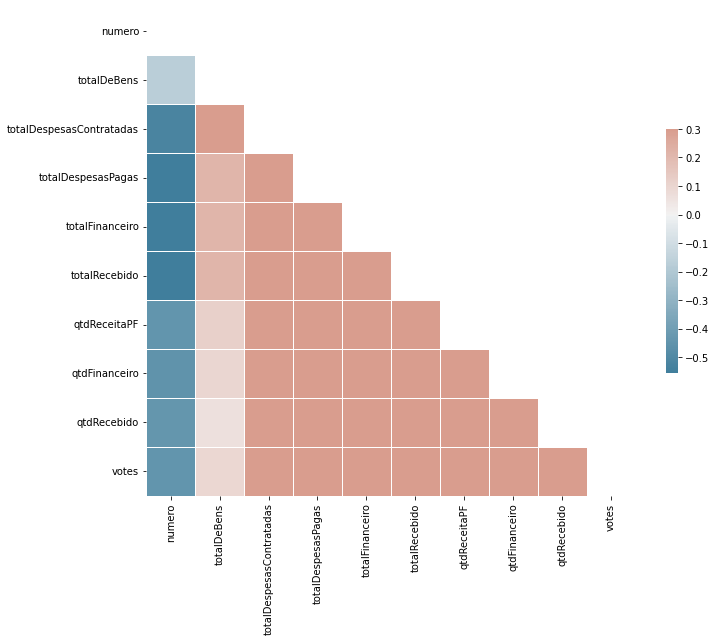

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = df_gov_simple.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
def plot_top_rank_correlation(my_df, column_target, max_rank=''):
    corr_matrix = my_df.corr()
    top_rank = len(corr_matrix) if max_rank == '' else int(max_rank)
    f, ax1 = plt.subplots(ncols=1, figsize=(18, 6), sharex=False)

    ax1.set_title('Top {} Correlations to "{}"'.format(top_rank, column_target))
    
    cols_top = corr_matrix.nlargest(top_rank, column_target)[column_target].index
    cm = np.corrcoef(my_df[cols_top].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 10}, yticklabels=cols_top.values,
                     xticklabels=cols_top.values, mask=mask, ax=ax1)
    
    plt.show()

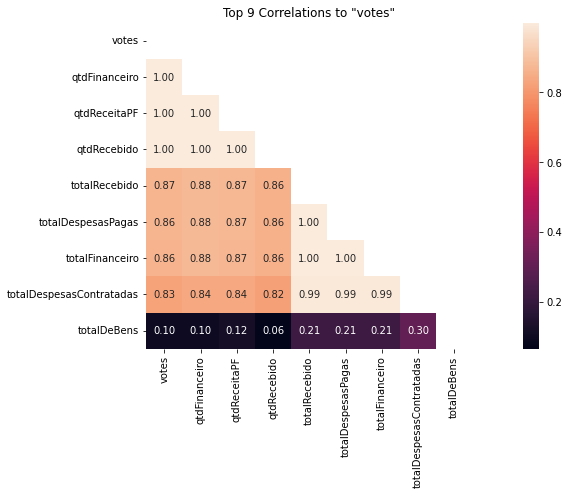

In [50]:
plot_top_rank_correlation(df_gov_simple.drop(['numero'], axis='columns'), 'votes')

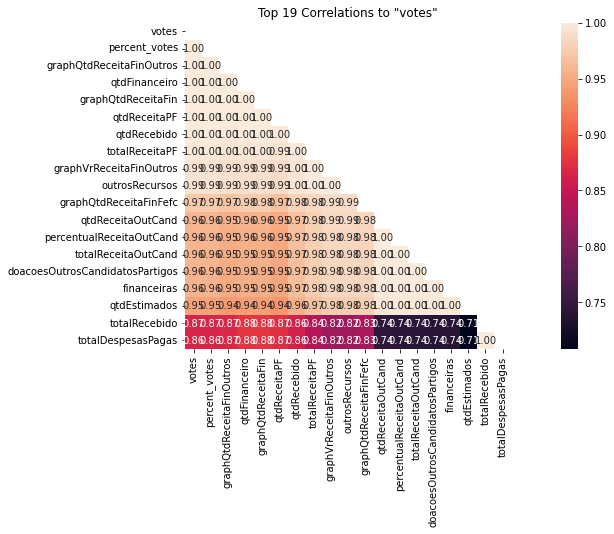

In [67]:
plot_top_rank_correlation(df_gov.drop(['numero'], axis='columns'), 'votes', 19)

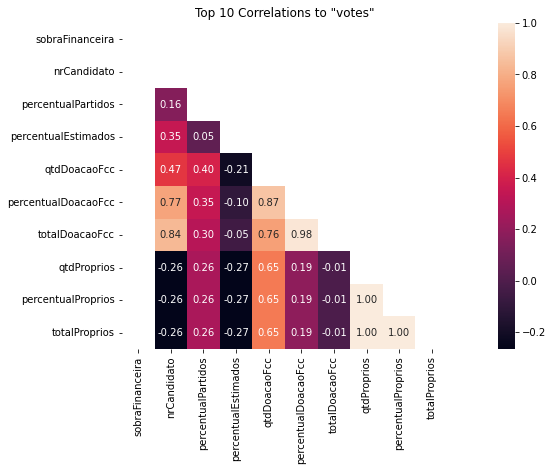

In [72]:
plot_bottom_rank_correlation(df_gov.drop(['numero', 'id', 'id_tse', 'dividaCampanha'], axis='columns'), 'votes', 10)

## Scatter plots

In [52]:
money_feats

['totalDeBens',
 'totalDespesasContratadas',
 'totalDespesasPagas',
 'totalFinanceiro',
 'totalRecebido',
 'qtdReceitaPF',
 'qtdFinanceiro',
 'qtdRecebido']

In [61]:
def scatter_corr_money_votes(money_feat):
    fig = px.scatter(df_gov, x=money_feat, y="percent_votes",
                     color="percent_votes",
                     hover_data=['nomeUrna', 'numero', 'votes', 'nomePartido'],
                     trendline="ols",
                     title= money_feat + " vs Votes")
    fig.show()

In [62]:
scatter_corr_money_votes('totalDeBens')

In [65]:
scatter_corr_money_votes('totalRecebido')